<a href="https://colab.research.google.com/github/bobs24/Data-Science-Learning-Path/blob/Learning/K_Means_Clustering_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:
K-Means clustering dilakukan untuk unsupervised machine learning, dan merupakan salah satu cara pengelompokan data dengan cara partisi 


Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score # rentang 0-1 (0 = klustering tidak bisa membedakan, 1 = klustering sangat bisa membedakan)

df = pd.read_csv('pelanggan_supermarket.csv')
df.head()
df1=df['Umur']
df2=df['Skor Belanja (1-100)']
pd.unique(df2)

array([ 39.,  81.,   6.,  77.,  40.,  76.,  94.,   3.,  72.,  14.,  99.,
        15.,  13.,  79., 150.,  66.,  29.,  98.,  35.,  73.,   5.,  82.,
        32.,  61.,  31.,  87.,   4.,  92.,  17.,  26.,  75.,  36.,  28.,
        65.,  55.,  47.,  42.,  nan,  52.,  60.,  54.,  45.,  41.,  50.,
        46.,  51.,  56.,  59.,  48.,  49.,  53.,  44.,  57.,  58.,  43.,
        91.,  95.,  11.,   9.,  34.,  71.,  88.,   7.,  10.,  93.,  12.,
        97.,  74.,  22.,  90.,  20.,  16.,  89.,  78.,  83.,  27.,  63.,
        86.,  24.,  68.,  85.,  23.,  69.,   8.,  18.])

# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [ ]:
#code here
df3=df.fillna(method='ffill')
df3
#pd.unique(df3['Umur']) #mengecek NaN

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


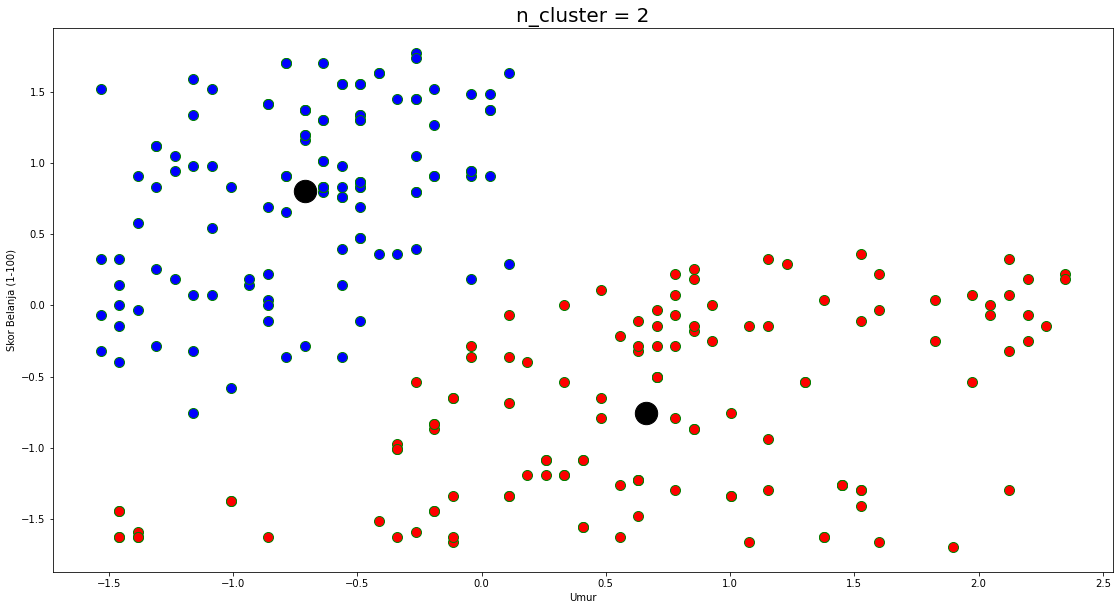

In [ ]:
def remove_outliers(df3):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1 
  df_final =df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)) )]
  return df_final

df_outliers_removed = remove_outliers(df3[['Umur','Skor Belanja (1-100)']])
df_outliers_removed.dropna(axis=0,inplace=True)
df10 = df_outliers_removed[['Umur','Skor Belanja (1-100)']]

#feature scaling
sc = StandardScaler()
df_outliers_std = sc.fit_transform(df10.astype(float))

#K-Means Clustering
kmeans1 = KMeans(n_clusters=2, random_state = 42).fit(df_outliers_std)
labels1 = kmeans1.labels_

new_df = pd.DataFrame(data = df_outliers_std,columns = ['Umur','Skor Belanja (1-100)'])
new_df['labels_kmeans']=labels1

plt.figure(figsize=(19,10))

plt.scatter(new_df.Umur[new_df.labels_kmeans == 0],new_df['Skor Belanja (1-100)'][new_df.labels_kmeans == 0], c ='red', s=100, edgecolor ='green', linestyle='-' )
plt.scatter(new_df.Umur[new_df.labels_kmeans == 1],new_df['Skor Belanja (1-100)'][new_df.labels_kmeans == 1], c ='blue', s=100, edgecolor ='green', linestyle='-' )

centers=kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('n_cluster = 2',size = 20)
plt.show()


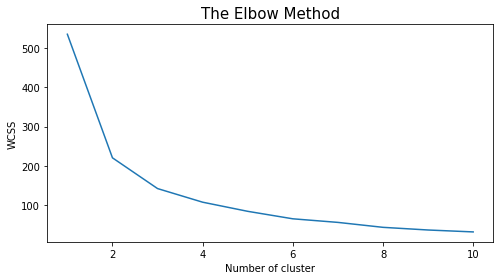

In [ ]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init="k-means++",random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('The Elbow Method',size = 15)
plt.show()

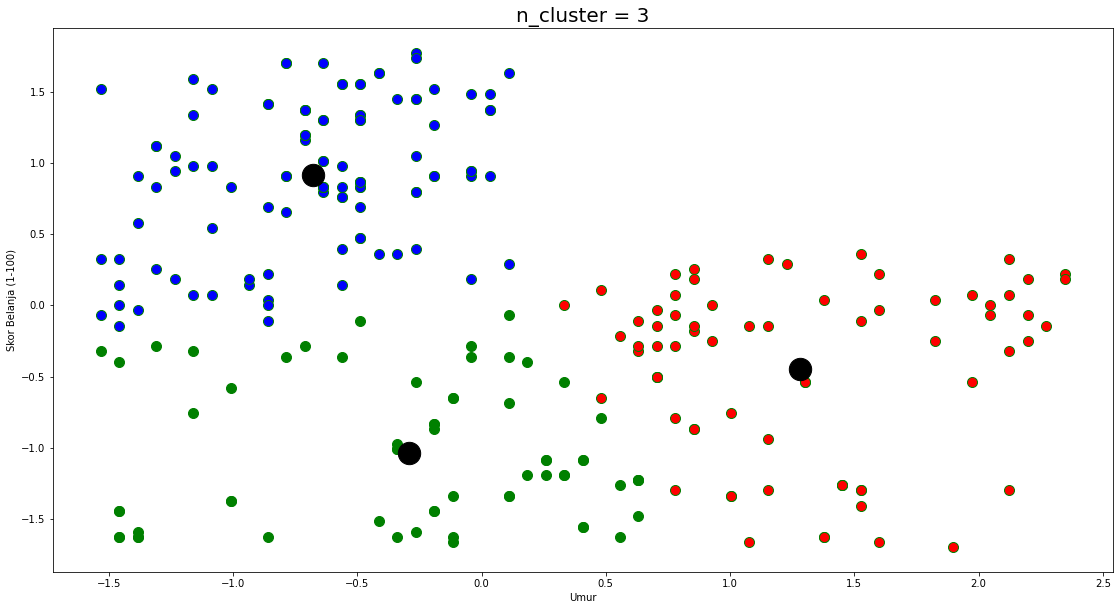

In [ ]:
#feature scaling
sc = StandardScaler()
df_outliers_std = sc.fit_transform(df10.astype(float))

#K-Means Clustering
kmeans2 = KMeans(n_clusters=3, random_state = 42).fit(df_outliers_std)
labels2 = kmeans2.labels_

new_df2 = pd.DataFrame(data = df_outliers_std,columns = ['Umur','Skor Belanja (1-100)'])
new_df2['labels_kmeans']=labels2

plt.figure(figsize=(19,10)) #besarin figure

plt.scatter(new_df2.Umur[new_df2.labels_kmeans == 0],new_df2['Skor Belanja (1-100)'][new_df2.labels_kmeans == 0], c ='green', s=100, edgecolor ='green', linestyle='-')
plt.scatter(new_df2.Umur[new_df2.labels_kmeans == 1],new_df2['Skor Belanja (1-100)'][new_df2.labels_kmeans == 1], c ='blue', s=100, edgecolor ='green', linestyle='-')
plt.scatter(new_df2.Umur[new_df2.labels_kmeans == 2],new_df2['Skor Belanja (1-100)'][new_df2.labels_kmeans == 2], c ='red', s=100, edgecolor ='green', linestyle='-')

centers=kmeans2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('n_cluster = 3',size = 20)
plt.show()

In [ ]:
df_outliers_std

array([[-1.45737424e+00, -3.95455898e-01],
       [-1.30822134e+00,  1.12141945e+00],
       [-1.38279779e+00, -1.58728653e+00],
       [-1.15906844e+00,  9.76955131e-01],
       [-5.62456840e-01, -3.59339818e-01],
       [-1.23364489e+00,  9.40839051e-01],
       [-2.64151040e-01, -1.58728653e+00],
       [-1.15906844e+00,  1.59092849e+00],
       [ 1.89856601e+00, -1.69563477e+00],
       [-6.37033290e-01,  7.96374733e-01],
       [ 2.12229536e+00, -1.29835789e+00],
       [-2.64151040e-01,  1.77150888e+00],
       [ 1.45110731e+00, -1.26224181e+00],
       [-1.08449199e+00,  9.76955131e-01],
       [-1.14998139e-01, -1.33447397e+00],
       [-1.23364489e+00,  1.04918729e+00],
       [-1.38279779e+00,  5.79678254e-01],
       [ 1.00364861e+00, -7.56616695e-01],
       [-2.64151040e-01,  1.73539281e+00],
       [-2.64151040e-01, -5.39920217e-01],
       [-1.00991554e+00,  8.32490812e-01],
       [ 5.56189911e-01, -1.62340261e+00],
       [-5.62456840e-01,  8.32490812e-01],
       [ 1.

In [ ]:
print(silhouette_score(new_df,labels=labels1))
print(silhouette_score(new_df2,labels=labels2))

0.5410815596473426
0.5947736006867299


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:
Berdasarkan dari clustering k = 3, kebanyakan dari customer yang datang adalah rata-rata umur keatas (0.5 s.d 2.5) sedangkan, untuk skor belanja semakin baik didapatkan dari rata-rata umur kebawah (0.5 s.d -1.5)

pengklusteran menjadi k=3 membuat nilai silhouette lebih menjauhi overlapping cluster.